In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='01a8d66b15074589b317cf0551577652',
                                                          client_secret='6c47eafc6cd047bea3f2bbc1a4a9f756'))

In [3]:
# playlist = sp.user_playlist_tracks("spotify", "5orZL8SetQM1LR3pMXZMOa")

In [4]:
playlist = sp.user_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY")

In [5]:
# playlist

In [6]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [9]:
playlist['total']

5295

In [10]:
playlist["next"] 

'https://api.spotify.com/v1/playlists/4rnleEAOdmFAbRcNCgZMpY/tracks?offset=100&limit=100&additional_types=track'

In [195]:
# playlist['tracks']['items']

In [74]:
def getTrackIDs(user, playlist_id):
    track_ids = []
    results = sp.user_playlist(user, playlist_id)
    for item in results['tracks']['items']:
        track = item['track']
        track_ids.append(track['id']) 

    return track_ids

track_ids = getTrackIDs('spotify', '5orZL8SetQM1LR3pMXZMOa')

print(len(track_ids))
print(track_ids)

100
['6OZh916QF8XNunWaP97WEZ', '25C5CowdsfXld2jJanbiex', '4saklk6nie3yiGePpBwUoc', '3tjFYV6RSFtuktYl3ZtYcq', '4lYTkvMkcNRj9uoSr8Zpws', '24ySl2hOPGCDcxBxFIqWBu', '0ct6r3EGTcMLPtrXHDvVjc', '2b8fOow8UzyDFAE27YhOZM', '1xQ6trAsedVPCdbtDAmk0c', '4WrS6vezaPwOafKJmHqMEU', '0sf12qNH5qcw8qpgymFOqD', '2Oycxb8QbPkpHTo8ZrmG0B', '7qEHsqek33rTcFNT9PFqLf', '24Yi9hE78yPEbZ4kxyoXAI', '6RsWqX8zABZLhZydXxEFOm', '1rgnBhdG2JDFTbYkYRZAku', '4Zpe9VME8DiFjLdqSqPRoZ', '0NwHcjsMMGgolX6CXFDwQT', '7gBj0VgcuAgkXkiRRYvSmK', '1CUVN2kn7mW5FjkqXTR2W1', '0KsB4TwgATg88aXCMBoO3Y', '5SxkdsY1ufZzoq9iXceLw9', '6nYoTBmGFNgfTyRC8x1Fvp', '0r4SsYcwvd8URat6AS2m6f', '0Y4hwUppbGc8aIBmiTz30A', '66hayvUbTotekKU3H4ta1f', '1gm616Plq4ScqNi7TVkZ5N', '6NFyWDv5CjfwuzoCkw47Xf', '5a7NdkF09AfD0H607eiOkX', '4EAV2cKiqKP5UPZmY6dejk', '1UfBAJfmofTffrae5ls6DA', '6y68QK2SwC38YxsbxHrA8I', '79jX8RM5CgPqDKdGEKNW9K', '4umIPjkehX1r7uhmGvXiSV', '3n3b5WNEohHP7Ou4ndBo6b', '1fWlO0aGCnI1ldWDMUrOyB', '4iZPNYqzI2L0uwuUKun7Aa', '5Sf3GyLEAzJXxZ5mbCPXTu', '1brwdY

In [ ]:
#     tracks = results['tracks']['items']
#         while results['tracks']['next']!=None:
#             results = sp.next(results['tracks'])
#             tracks = tracks + results['tracks']['items']
 

In [44]:
# this is for 100 songs but dataframe(df_final) for the rest is at the end


def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    
    name = track_info['name']
    album = track_info['album']['name']
    artist = track_info['album']['artists'][0]['name']
    release_date = track_info['album']['release_date']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness'] 
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, 
                  instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [47]:
track_list = []

for i in  range(len(track_ids)):
    sleep(randint(1,3))
    track_data = getTrackFeatures(track_ids[i])
    track_list.append(track_data)
    
Top_Hits = pd.DataFrame(track_list, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 
                  'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])

Top_Hits.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Fast Car,Fast Car,Jonas Blue,2015-12-04,212424,0,0.4530,0.459,0.587,0.0,0.3070,-6.983,0.0785,113.901,4
1,Sorry Not Sorry,Sorry Not Sorry,Demi Lovato,2017-07-11,203760,0,0.0252,0.701,0.638,0.0,0.2560,-6.889,0.2380,144.084,4
2,Dynamite,BE,BTS,2020-11-20,199053,86,0.0112,0.746,0.765,0.0,0.0936,-4.410,0.0993,114.044,4
3,Mood (feat. iann dior),Mood (feat. iann dior),24kGoldn,2020-07-24,140525,36,0.2210,0.700,0.722,0.0,0.2720,-3.558,0.0369,90.989,4
4,Mercy,Mercy,Shawn Mendes,2016-08-18,208733,0,0.1090,0.563,0.684,0.0,0.1100,-4.916,0.0919,147.920,4


In [48]:
Top_Hits.shape

(100, 15)

In [ ]:
# create function to extract contributing artists as lists from each song
# def track_artists(spotify_tracks):
#     artists = [[track['track']['artists'][x]['name'] for x in range(len(track['track']['artists']))]for track in spotify_tracks]
#     return artists

In [ ]:
# #create function to extract track names from a list of track names and return the result as a list
# def track_titles(spotify_tracks):
#     titles = [track['track']['name']for track in spotify_tracks]
#     return titles

In [80]:
# sp.next(playlist)

In [192]:
# df_names = pd.DataFrame(names_playlist)
# df_names

In [11]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [13]:
whole_playlist = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")

In [14]:
len(whole_playlist)

5295

In [15]:
whole_playlist[1]['track']['artists'][0]['name']

'Mike Posner'

In [16]:
def track_artists(spotify_tracks):
    artist = [whole_playlist[i]['track']['artists'][0]['name'] for i in range(len(spotify_tracks))]
    return artist

In [17]:
songs_artist = track_artists(whole_playlist)
# songs_artist

In [18]:
df_artist = pd.DataFrame(songs_artist, columns=['artist'])
df_artist

,artist
0,Hozier
1,Mike Posner
2,"Tyler, The Creator"
3,Bastille
4,Shakira
...,...
5290,MARINA
5291,Olivia Rodrigo
5292,BIA
5293,Ashnikko


In [19]:
def track_name(spotify_tracks):
    name = [whole_playlist[i]['track']['name'] for i in range(len(spotify_tracks))]
    return name

In [20]:
songs_name = track_name(whole_playlist)

# songs_name

In [21]:
df_name = pd.DataFrame(songs_name, columns = ['name'])
df_name

,name
0,Take Me To Church
1,Cooler Than Me - Single Mix
2,See You Again (feat. Kali Uchis)
3,Pompeii
4,Hips Don't Lie (feat. Wyclef Jean)
...,...
5290,Hermit the Frog
5291,deja vu
5292,WHOLE LOTTA MONEY
5293,Slumber Party (feat. Princess Nokia)


In [22]:
song_uri = whole_playlist[0]['track']['uri']
song_uri

'spotify:track:7dS5EaCoMnN7DzlpT6aRn2'

In [23]:
#create function to extract track uris from a list of tracks
def track_uris(spotify_tracks):
    uris = [whole_playlist[i]['track']['uri'] for i in range(len(spotify_tracks))]
    return uris
song_uris = track_uris(whole_playlist)

# song_uris

In [24]:
df_uri = pd.DataFrame(song_uris, columns = ['uri'])
df_uri

,uri
0,spotify:track:7dS5EaCoMnN7DzlpT6aRn2
1,spotify:track:2V4bv1fNWfTcyRJKmej6Sj
2,spotify:track:7KA4W4McWYRpgf0fWsJZWB
3,spotify:track:3gbBpTdY8lnQwqxNCcf795
4,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V
...,...
5290,spotify:track:4Zcz6saEkOII3PlXd9gN3o
5291,spotify:track:61KpQadow081I2AsbeLcsb
5292,spotify:track:5yorXJWdBan1Vlh116ZtQ7
5293,spotify:track:11ZulcYY4lowvcQm4oe3VJ


In [152]:
features = [sp.audio_features(i) for i in (song_uris)]
# features

In [42]:
# features 

In [153]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [154]:
features1 = flatten(features)
features1[0]

{'danceability': 0.566,
 'energy': 0.664,
 'key': 4,
 'loudness': -5.303,
 'mode': 0,
 'speechiness': 0.0464,
 'acousticness': 0.634,
 'instrumentalness': 0,
 'liveness': 0.116,
 'valence': 0.437,
 'tempo': 128.945,
 'type': 'audio_features',
 'id': '7dS5EaCoMnN7DzlpT6aRn2',
 'uri': 'spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
 'track_href': 'https://api.spotify.com/v1/tracks/7dS5EaCoMnN7DzlpT6aRn2',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7dS5EaCoMnN7DzlpT6aRn2',
 'duration_ms': 241688,
 'time_signature': 4}

In [ ]:
# def audio_features_songs(spotify_tracks):
#     features_uris = [features for song_uris in spotify_tracks]
#     return features_uris
# features_uris = audio_features_songs(whole_playlist)

# features_uris

In [156]:
df_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo})
df_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024
...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034
5291,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088
5292,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012


In [155]:
danceability = [features1[i]['danceability'] for i in range(len(features1))]
energy = [features1[i]['energy'] for i in range(len(features1))]
key = [features1[i]['key'] for i in range(len(features1))]
loudness = [features1[i]['loudness'] for i in range(len(features1))]
mode = [features1[i]['mode'] for i in range(len(features1))]
speechiness = [features1[i]['speechiness'] for i in range(len(features1))]
acousticness = [features1[i]['acousticness'] for i in range(len(features1))]
instrumentalness = [features1[i]['instrumentalness'] for i in range(len(features1))]
liveness = [features1[i]['liveness'] for i in range(len(features1))]
valence = [features1[i]['valence'] for i in range(len(features1))]
tempo = [features1[i]['tempo'] for i in range(len(features1))]

In [157]:
df_final = pd.concat([df_artist, df_name, df_uri, df_features], axis=1)

In [158]:
df_final

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558
3,Bastille,Pompeii,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435
4,Shakira,Hips Don't Lie (feat. Wyclef Jean),spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,MARINA,Hermit the Frog,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034
5291,Olivia Rodrigo,deja vu,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088
5292,BIA,WHOLE LOTTA MONEY,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008
5293,Ashnikko,Slumber Party (feat. Princess Nokia),spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012


In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [159]:
cluster_data = df_final.drop(['artist','name','uri'], axis=1)

In [160]:
scaler= StandardScaler().fit(cluster_data)
X_scaled = scaler.transform(cluster_data)

In [161]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=1234)

In [162]:
clusters = kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()

0    1473
1     157
2    3665
dtype: int64

In [163]:
df_final['cluster'] = clusters

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

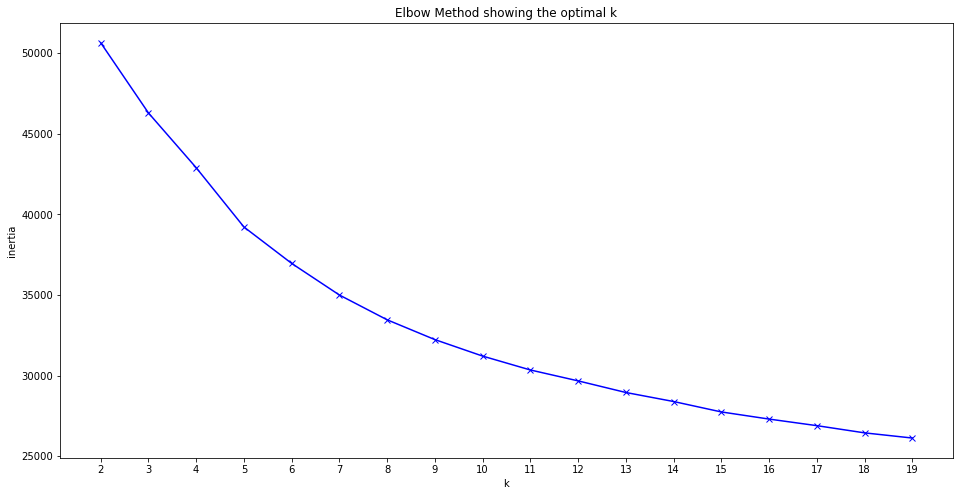

In [164]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [165]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()

0     646
1    1786
2     667
3    2046
4     150
dtype: int64

In [166]:
clusters.shape

(5295,)

In [167]:
kmeans.inertia_ 

39212.0223673177

In [168]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=30,  
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

42180.9149181349


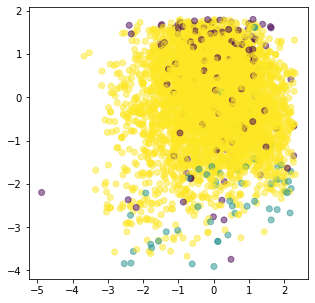

In [169]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X_scaled)

plt.figure(figsize=(5, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred,alpha=0.5)
plt.show()

In [90]:
# df_final.head()

In [121]:
topsongs = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\DAFT\Day26 Lab\lab-web-scraping-single-page\topsongs.csv')
# topsongs

In [123]:
print(topsongs)

    Unnamed: 0              song                                   artist
0            0        Way 2 Sexy      Drake Featuring Future & Young Thug
1            1  Girls Want Girls                 Drake Featuring Lil Baby
2            2        Fair Trade             Drake Featuring Travis Scott
3            3  Champagne Poetry                                    Drake
4            4        Knife Talk  Drake Featuring 21 Savage & Project Pat
..         ...               ...                                      ...
95          95    Summer Of Love                     Shawn Mendes & Tainy
96          96        Ain't Shit                                 Doja Cat
97          97       Motley Crew                              Post Malone
98          98    Remote Control                               Kanye West
99          99           Baddest        Yung Bleu, Chris Brown & 2 Chainz

[100 rows x 3 columns]


In [184]:
'Remote Control' in np.array(topsongs)

True

In [92]:
import random

In [170]:
def features_api(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features_api = sp.audio_features(uri)
    return features_api

In [148]:
features_api('Take Me To Church', 'Hozier')

[{'danceability': 0.566,
  'energy': 0.664,
  'key': 4,
  'loudness': -5.303,
  'mode': 0,
  'speechiness': 0.0464,
  'acousticness': 0.634,
  'instrumentalness': 0,
  'liveness': 0.116,
  'valence': 0.437,
  'tempo': 128.945,
  'type': 'audio_features',
  'id': '1CS7Sd1u5tWkstBhpssyjP',
  'uri': 'spotify:track:1CS7Sd1u5tWkstBhpssyjP',
  'track_href': 'https://api.spotify.com/v1/tracks/1CS7Sd1u5tWkstBhpssyjP',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1CS7Sd1u5tWkstBhpssyjP',
  'duration_ms': 241693,
  'time_signature': 4}]

In [ ]:
# if new_song in list(top100['song_title']):
#     recommendation_hot = random.choice(list(top100['song_title']))
#     while recommendation_hot == new_song:
#             recommendation_hot = random.choice(list(top100['song_title']))
#             print('Your recommendation:', recommendation_hot)
# else:
#     feature = features(new_song, new_artist)
#     column = list(feature[0].keys())
#     values = [list(feature[0].values())]
#     df_new_song = pd.DataFrame(data = feature, columns = column)
#     df_new_song = df_new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
#     std_new_song = scaler.transform(df_new_song)
#     new_cluster = kmeans.predict(std_new_song)
#     df_cluster = cluster_df[cluster_df['cluster'] == list(new_cluster)[0]]

#     print('Your recommendation:',random.choice(list(df_cluster['song_and_artist'])))


In [ ]:
# def recommend():
#     new_song = input("Enter a song: ").lower()
#     new_artist = input("Enter an artist: ").lower()
#     if new_song in np.array(topsongs['song']):
#         return random.choice(np.array(topsongs['song']))
#     else:
#         feature = features_api(new_song, new_artist)
#         column = list(feature[0].keys())
#         values = [list(feature[0].values())]
#         df_new_song = pd.DataFrame(data = feature, columns = column)
#         df_new_song = df_new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
#         std_new_song = scaler.transform(df_new_song)
#         new_cluster = kmeans.predict(std_new_song)
#         df_cluster = df_final[df_final['cluster'] == list(new_cluster)[0]]
        

#         print('Your recommendation:',random.choice(list(df_cluster['name'])))

In [211]:

def recommend():
    new_song = input("Enter a song: ").lower()
    new_artist = input("Enter an artist: ").lower()
    try:
        
        if new_song in np.array(topsongs['song']):
            return random.choice(np.array(topsongs['song']))
        else:
            feature = features_api(new_song, new_artist)
            column = list(feature[0].keys())
            values = [list(feature[0].values())]
            df_new_song = pd.DataFrame(data = feature, columns = column)
            df_new_song = df_new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
            std_new_song = scaler.transform(df_new_song)
            new_cluster = kmeans.predict(std_new_song)
            df_cluster = df_final[df_final['cluster'] == list(new_cluster)[0]]
        

            print('Your recommendation:',random.choice(list(df_cluster['name'])))
    except:
         print('Ups! This song is not exist! Please try a new one')
#     new_artist = input('Enter an artist: ')
#     song_scaled = scaler.transform(song_audio_features)
#     kmeans.predict(song_scaled)
    
#     for s in kmeans.predict(song_scaled):
#         print(random.df_final['name'])

In [213]:
recommend()

Enter a song: git
Enter an artist: sezen aksu
Your recommendation: Tyynysotaa


In [183]:
df_final

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,0
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,2
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,0
3,Bastille,Pompeii,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,2
4,Shakira,Hips Don't Lie (feat. Wyclef Jean),spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,MARINA,Hermit the Frog,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,2
5291,Olivia Rodrigo,deja vu,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,0
5292,BIA,WHOLE LOTTA MONEY,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,0
5293,Ashnikko,Slumber Party (feat. Princess Nokia),spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,0
